## Importing Packages

In [1]:
import os
import sys
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
import matplotlib.pyplot as plt
import string
import re
import numpy as np
import itertools
from nltk import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag

In [2]:
df = pd.read_csv('fake reviews dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


## Data Undersatding

In [3]:
df['category'].value_counts()

category
Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: count, dtype: int64

In [4]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


## Text Preprocessing: Tokenization

In [5]:
#tokenizing the text data in the 'text_' column of df
corpus = [word_tokenize(doc) for doc in df['text_']]

# getting common stop words in english that we'll remove during tokenization/text normalization
stop_words = stopwords.words('english')
corpus_no_stopwords = []
for words in corpus:
    docs = [x.lower() for x in words if ((x.isalpha()) & (x not in stop_words))]
    corpus_no_stopwords.append(docs)

## Lemmantizing

In [6]:
def lemmatizer(corpus):
    lem = WordNetLemmatizer()
    
    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None
    lemmatized_corpus = []
    for sentence in corpus:
        pos_tags = pos_tag(sentence)
        lemmatized_sentence = []
        for word, tag in pos_tags:
            pos = pos_tagger(tag)
            if pos is not None:
                lemmatized_word = lem.lemmatize(word, pos)
            else:
                lemmatized_word = lem.lemmatize(word)
            lemmatized_sentence.append(lemmatized_word)
        lemmatized_corpus.append(lemmatized_sentence)
    
    return lemmatized_corpus
        

In [7]:
lemmatized_corpus = lemmatizer(corpus_no_stopwords)

In [8]:
joined_lemm_corpus = [' '.join(x) for x in lemmatized_corpus]
df['text_preproccesed'] = pd.Series(data=joined_lemm_corpus)

In [9]:
df

,category,rating,label,text_,text_preproccesed
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",love well make sturdy comfortable i love very ...
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",love great upgrade original i mine couple year
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,this pillow save back i love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",miss information use great product price i
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,very nice set good quality we set two month
...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...,i read review say bra run small i order two ba...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...,i sure exactly would it little large small siz...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ...",you wear hood wear hood wear jacket without ho...
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...,i like nothing dress the reason i give star i ...


In [10]:
df['category'].value_counts()

category
Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: count, dtype: int64

In [11]:
df['rating'].value_counts()

rating
5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: count, dtype: int64

### Destribution of categories by rating

<Figure size 3000x2000 with 0 Axes>

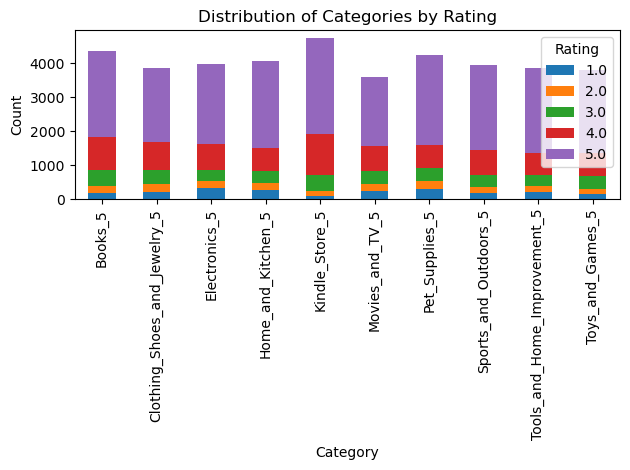

In [12]:
plt.figure(figsize=(30, 20))
df_grouped = df.groupby(['category', 'rating']).size().unstack(fill_value=0)
df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories by Rating')
plt.xticks(rotation=90)
plt.legend(title='Rating')
plt.tight_layout()


plt.show()

In [13]:
df_positive_ratings = df[(df['rating'] >= 4.0) & (df['rating'] <= 5.0)]


In [14]:
category_percentages = (df_positive_ratings['category'].value_counts() / df['category'].value_counts()) * 100


In [15]:
category_percentages = category_percentages.sort_values(ascending=False)


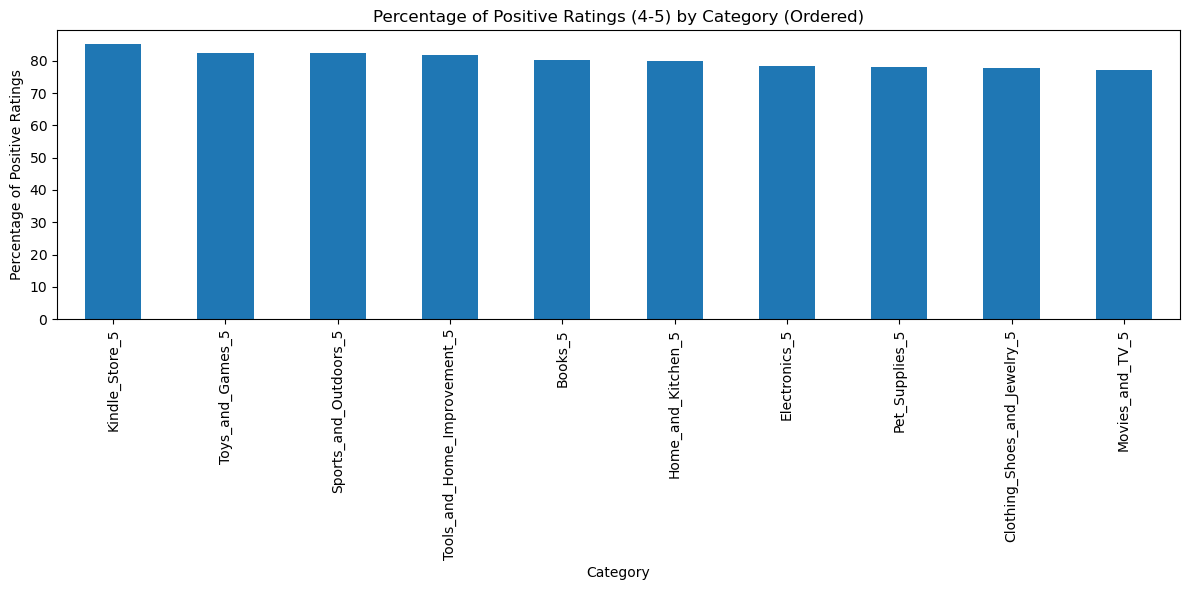

In [16]:
plt.figure(figsize=(12, 6))
category_percentages.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Percentage of Positive Ratings')
plt.title('Percentage of Positive Ratings (4-5) by Category (Ordered)')
plt.xticks(rotation=90)
plt.tight_layout()


In [17]:
df_negative_ratings = df[(df['rating'] >= 1.0) & (df['rating'] <= 4.0)]


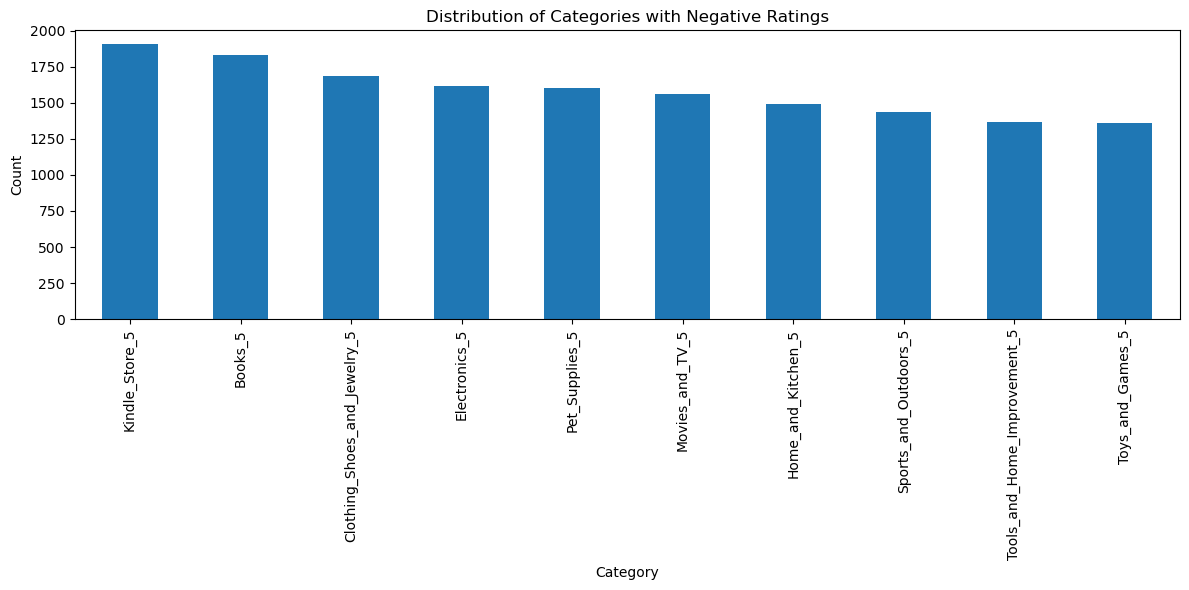

In [18]:
plt.figure(figsize=(12, 6))
category_counts = df_negative_ratings['category'].value_counts()
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories with Negative Ratings')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

<Figure size 3000x2000 with 0 Axes>

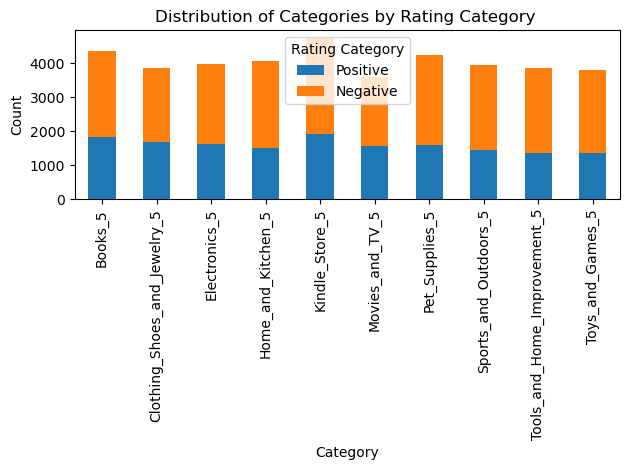

In [19]:
df['rating_category'] = df['rating'].apply(lambda x: 'More than 4' if x > 4 else 'Less than 4')

# Group the data by 'category' and 'rating_category' and calculate the counts
category_rating_counts = df.groupby(['category', 'rating_category']).size().unstack(fill_value=0)

# Define a color palette for the two categories

# Create a grouped bar plot to show the distribution of categories by the two rating categories
plt.figure(figsize=(30, 20))
category_rating_counts.plot(kind='bar', stacked=True)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories by Rating Category ')
plt.xticks(rotation=90)
plt.legend(title='Rating Category', labels=['Positive', 'Negative'])
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

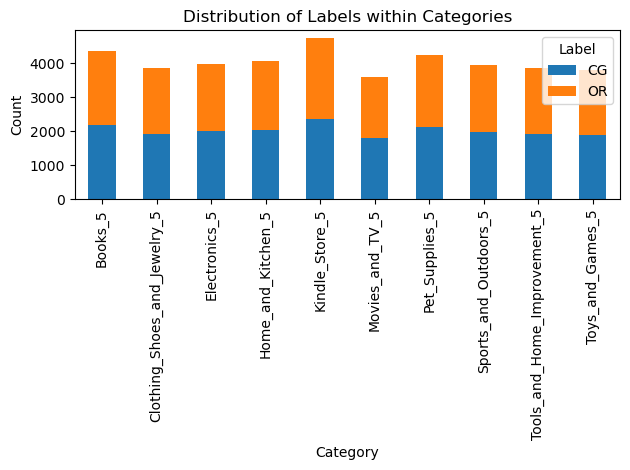

In [20]:
plt.figure(figsize=(12, 6))
label_category_counts = df.groupby(['category', 'label']).size().unstack(fill_value=0)
label_category_counts.plot(kind='bar', stacked=True)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Labels within Categories')
plt.xticks(rotation=90)
plt.legend(title='Label')
plt.tight_layout()

plt.show()

In [21]:
# Calculate the word count for each text_preprocessed and add it as a new column
df['word_count'] = df['text_'].apply(lambda x: len(x.split()))


In [22]:
# Get the value counts of categories by word count
category_word_counts = df.groupby('category')['word_count'].mean().sort_values(ascending=False)


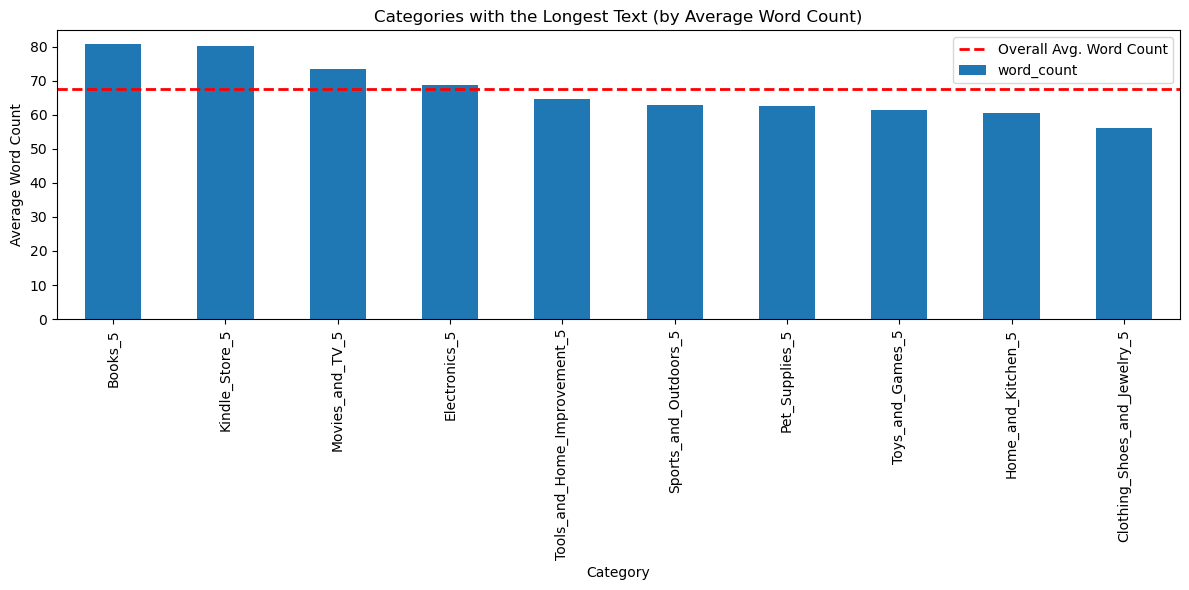

In [23]:
plt.figure(figsize=(12, 6))
category_word_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Average Word Count')
plt.title('Categories with the Longest Text (by Average Word Count)')
plt.xticks(rotation=90)
plt.axhline(df['word_count'].mean(), color='red', linestyle='dashed', linewidth=2, label='Overall Avg. Word Count')
plt.legend()
plt.tight_layout()

plt.show()

In [24]:
# Get the value counts of categories by word count
rating_word_counts = df.groupby('rating')['word_count'].mean().sort_values(ascending=False)


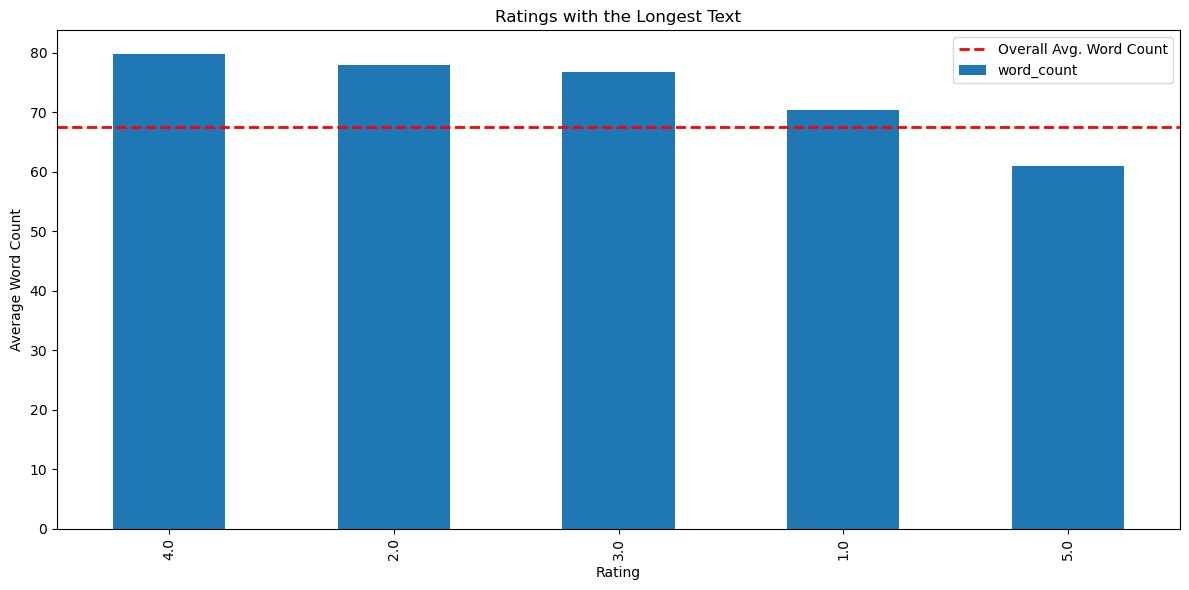

In [25]:
plt.figure(figsize=(12, 6))
rating_word_counts.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Average Word Count')
plt.title('Ratings with the Longest Text')
plt.xticks(rotation=90)
plt.axhline(df['word_count'].mean(), color='red', linestyle='dashed', linewidth=2, label='Overall Avg. Word Count')
plt.legend()
plt.tight_layout()

plt.show()

In [61]:
df['word_count'] = df['text_preproccesed'].apply(lambda x: len(x.split()))

label_word_counts = df.groupby('label')['word_count'].mean().sort_values(ascending=False)


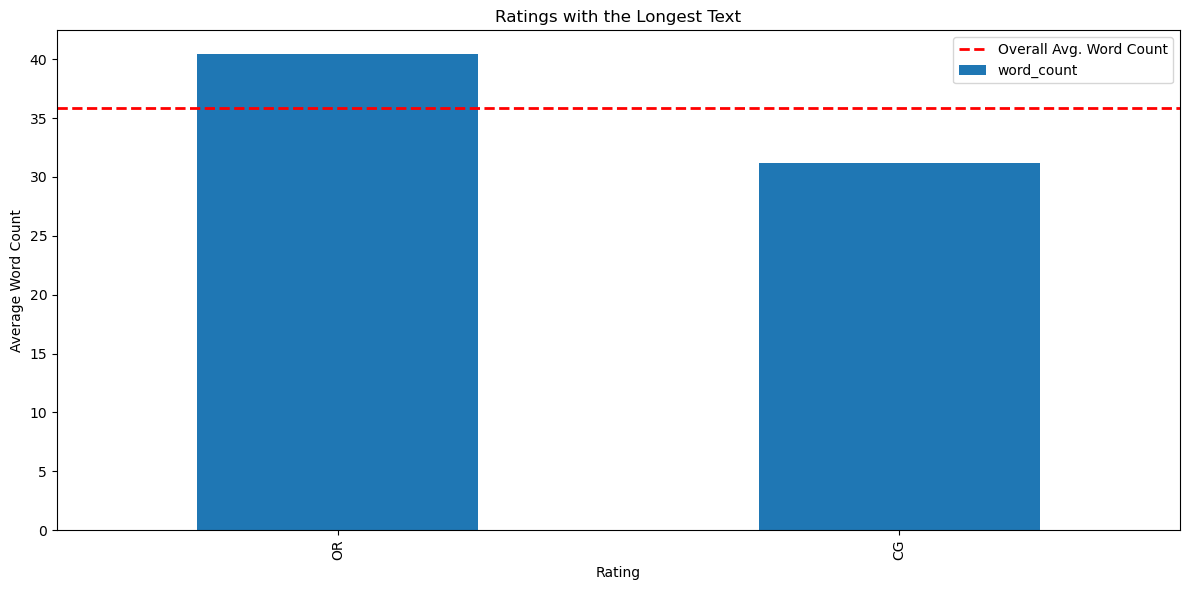

In [62]:
plt.figure(figsize=(12, 6))
label_word_counts.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Average Word Count')
plt.title('Ratings with the Longest Text')
plt.xticks(rotation=90)
plt.axhline(df['word_count'].mean(), color='red', linestyle='dashed', linewidth=2, label='Overall Avg. Word Count')
plt.legend()
plt.tight_layout()

plt.show()

<Figure size 1200x600 with 0 Axes>

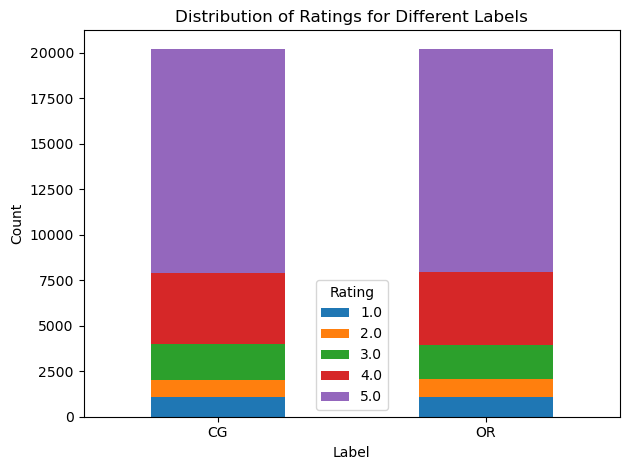

In [28]:
label_rating_counts = df.groupby(['label', 'rating']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
label_rating_counts.plot(kind='bar', stacked=True)

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Ratings for Different Labels')
plt.xticks(rotation=0)  # You can change rotation if needed
plt.legend(title='Rating', labels=label_rating_counts.columns)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

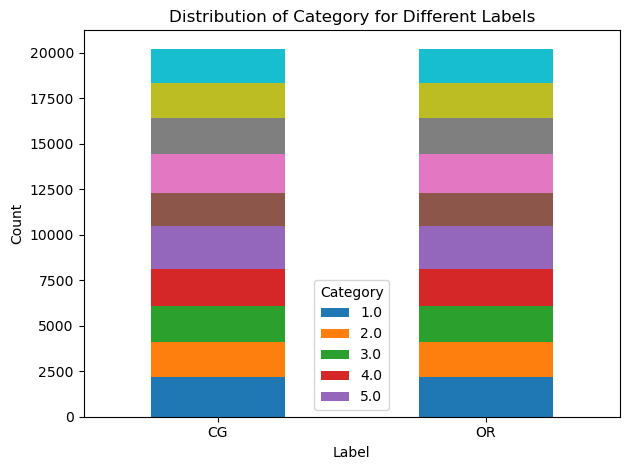

In [63]:
label_category_counts = df.groupby(['label', 'category']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
label_category_counts.plot(kind='bar', stacked=True)

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Category for Different Labels')
plt.xticks(rotation=0)  # You can change rotation if needed
plt.legend(title='Category', labels=label_rating_counts.columns)
plt.tight_layout()
plt.show()

In [53]:
import pandas as pd
from collections import Counter

# Assuming you have a DataFrame called 'df'

# Define a function to extract the most popular words from a given text corpus
def get_top_words(text_corpus, n=10):
    # Tokenize the text corpus into words
    words = text_corpus.split()
    # Create a counter for word frequencies
    word_counts = Counter(words)
    # Get the n most common words
    top_words = word_counts.most_common(n)
    return top_words

# Filter the DataFrame for each category and rating group
df_cg = df[(df['label'] == 'CG')]
df_or = df[(df['label'] == 'OR')]
df_positive = df[(df['rating'] >= 4)]
df_negative = df[(df['rating'] < 4)]

# Extract text data for CG, OR, positive ratings, and negative ratings
text_cg = " ".join(df_cg['text_preproccesed'])
text_or = " ".join(df_or['text_preproccesed'])
text_positive_cg = " ".join(df_cg[df_cg['rating'] >= 4]['text_preproccesed'])
text_negative_cg = " ".join(df_cg[df_cg['rating'] < 4]['text_preproccesed'])
text_positive_or = " ".join(df_or[df_or['rating'] >= 4]['text_preproccesed'])
text_negative_or = " ".join(df_or[df_or['rating'] < 4]['text_preproccesed'])

# Get the 20 most popular words for each category and rating group
top_words_cg_positive = get_top_words(text_positive_cg, n=20)
top_words_cg_negative = get_top_words(text_negative_cg, n=20)
top_words_or_positive = get_top_words(text_positive_or, n=20)
top_words_or_negative = get_top_words(text_negative_or, n=20)

# Display the results
print("Top 20 words for CG label (Positive):", top_words_cg_positive)
print("Top 20 words for CG label (Negative):", top_words_cg_negative)
print("Top 20 words for OR label (Positive):", top_words_or_positive)
print("Top 20 words for OR label (Negative):", top_words_or_negative)


Top 20 words for CG label (Positive): [('i', 48968), ('the', 17125), ('love', 10513), ('book', 8865), ('great', 8856), ('good', 7744), ('it', 7661), ('one', 5667), ('read', 5645), ('story', 5599), ('well', 5258), ('use', 5024), ('like', 4862), ('this', 4779), ('would', 4663), ('character', 4152), ('little', 4132), ('buy', 4004), ('recommend', 3806), ('get', 3529)]
Top 20 words for CG label (Negative): [('i', 13632), ('the', 4838), ('it', 2119), ('book', 2100), ('love', 2081), ('good', 2018), ('great', 1954), ('one', 1621), ('would', 1429), ('like', 1394), ('story', 1369), ('read', 1322), ('use', 1293), ('little', 1187), ('this', 1185), ('buy', 1157), ('well', 1136), ('movie', 1046), ('recommend', 1024), ('get', 964)]
Top 20 words for OR label (Positive): [('i', 33410), ('the', 7409), ('one', 5730), ('love', 5695), ('it', 5426), ('great', 5346), ('book', 5161), ('get', 4999), ('like', 4662), ('use', 4613), ('this', 4594), ('good', 4337), ('well', 4252), ('make', 3865), ('work', 3478), (

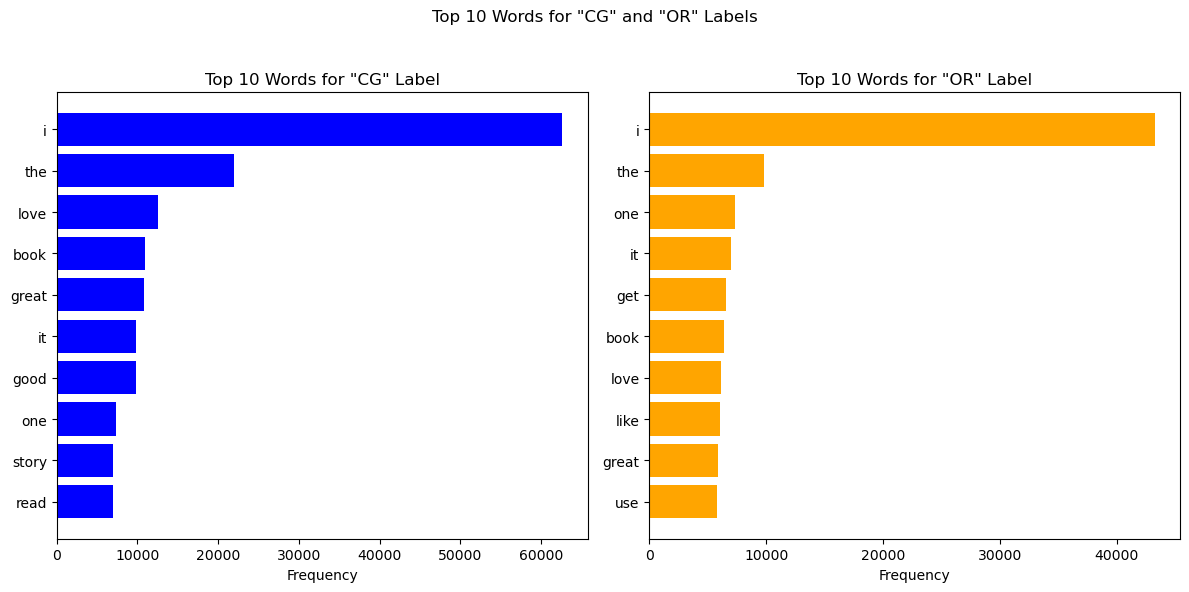

In [43]:
df_cg = df[df['label'] == 'CG']  
df_or = df[df['label'] == 'OR']

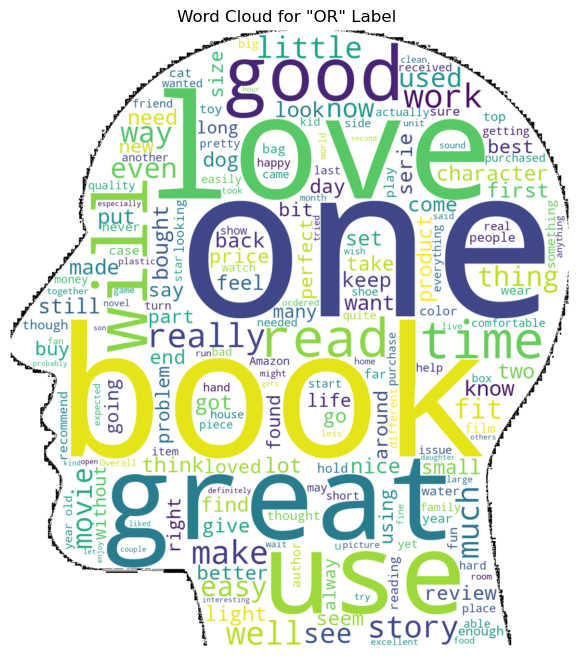

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


face_mask = np.array(Image.open('/Users/katyaserbina/Documents/Flatiron/Project 4/NLP-Review-Detector/Ekaterina/face_picture.jpeg'))
text_corpus = " ".join(df_or['text_'])

wordcloud = WordCloud(
    width=800,
    height=800,
    background_color='white',
    mask=face_mask,
    contour_color='black',  # Optional: Add a contour around the face
    contour_width=1,
).generate(text_corpus)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for "OR" Label ')
plt.show()

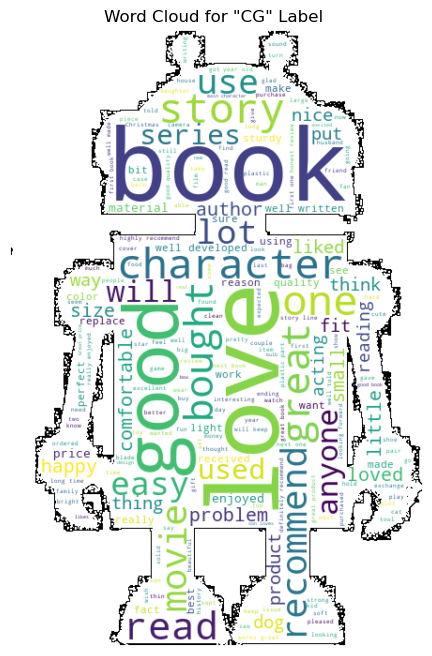

In [46]:

robot_mask = np.array(Image.open('/Users/katyaserbina/Documents/Flatiron/Project 4/NLP-Review-Detector/Ekaterina/SIlhouette.png'))

text_corpus_2 = " ".join(df_cg['text_'])

wordcloud = WordCloud(
    width=800,
    height=800,
    background_color='white',
    mask=robot_mask,
    contour_color='black',  
    contour_width=1,
).generate(text_corpus_2)


plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for "CG" Label ')
plt.show()


In [30]:
tokens_unique = pd.Series(flattenedcorpus_tokens.unique())

NameError: name 'flattenedcorpus_tokens' is not defined

In [ ]:
# flattening the list of tokenized words contained in the corpus list
flattenedcorpus_tokens = pd.Series(list(itertools.chain(*corpus)))
print(flattenedcorpus_tokens.shape)

### Dealing with Stop words + lowercase

In [ ]:
len(tokens_no_stop_words)

In [ ]:
df['tok_norm'] = df['text_'].apply(first_step_normalizer)
df.head()

In [ ]:
norm_toks_flattened = pd.Series(list(
    itertools.chain(*df['tok_norm'])))
new_dictionary = norm_toks_flattened.unique()
print(len(new_dictionary))

In [ ]:
print(len(dictionary))

- Process removed 22.500 features

## Text Preprocessing: Lemmatization

#### We created function which takes in untokenized document and returns fully normalized token list

In [ ]:
def process_doc(doc):

    wnl = WordNetLemmatizer()

    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None
        
    # remove stop words and punctuations, then lower case
    doc_norm = [tok.lower() for tok in word_tokenize(doc) if ((tok.isalpha()) & (tok not in stop_words)) ]

    # creates list of tuples with tokens and POS tags in wordnet format
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(doc_norm))) 
    doc_norm = [wnl.lemmatize(token, pos) for token, pos in wordnet_tagged if pos is not None]
    
    return doc_norm

### Applying text Tokenization/Normalization to whole body of df

In [ ]:
fully_normalized_corpus = df['text_'].apply(process_doc)

In [ ]:
fully_normalized_corpus.head()

In [ ]:
flattened_fully_norm = pd.Series(list(itertools.chain(*fully_normalized_corpus)))
len(flattened_fully_norm.unique())

In [ ]:
flattened_fully_norm

In [ ]:
# flattening the lists
fnc_output = fully_normalized_corpus.apply(" ".join)
fnc_output